<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Env-wrapper-development" data-toc-modified-id="Env-wrapper-development-1">Env wrapper development</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Env-creation" data-toc-modified-id="Env-creation-1.2">Env creation</a></span></li><li><span><a href="#Reset-output" data-toc-modified-id="Reset-output-1.3">Reset output</a></span></li><li><span><a href="#Reset-with-a-single-arena" data-toc-modified-id="Reset-with-a-single-arena-1.4">Reset with a single arena</a></span></li><li><span><a href="#Verify-that-resetting-enviroment-modifies-both-arenas" data-toc-modified-id="Verify-that-resetting-enviroment-modifies-both-arenas-1.5">Verify that resetting enviroment modifies both arenas</a></span></li><li><span><a href="#Verify-that-resetting-one-arena-does-not-modify-the-other" data-toc-modified-id="Verify-that-resetting-one-arena-does-not-modify-the-other-1.6">Verify that resetting one arena does not modify the other</a></span></li><li><span><a href="#Experiments-with-one-arena" data-toc-modified-id="Experiments-with-one-arena-1.7">Experiments with one arena</a></span><ul class="toc-item"><li><span><a href="#Unity-Environment" data-toc-modified-id="Unity-Environment-1.7.1">Unity Environment</a></span></li><li><span><a href="#Env-wrapper" data-toc-modified-id="Env-wrapper-1.7.2">Env wrapper</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.8">Summary</a></span></li></ul></li></ul></div>

# Env wrapper development

On this notebook I will do some experiments that will guide in the creation of the env wrapper.

## Imports

In [1]:
# Use this to reload changes in python scripts
%load_ext autoreload
%autoreload 2

In [2]:
from orangutan.env import EnvWrapper
from animalai.envs import UnityEnvironment
from animalai.envs.arena_config import ArenaConfig
from animalai.envs.exception import UnityWorkerInUseException


In [3]:
import os

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (20, 5)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Env creation

In [53]:
ENVIRONMENT_FILEPATH = '/media/guillermo/Data/Dropbox/02 Inteligencia Artificial/31_animalai/AnimalAI-Olympics/env/AnimalAI.x86_64'

def _create_environment(config_filepath, n_arenas=1):
    worker_id = 0
    while worker_id < 10:
        try:
            env = EnvWrapper(
                file_name=ENVIRONMENT_FILEPATH,   # Path to the environment
                worker_id=worker_id,                # Unique ID for running the environment (used for connection)
                seed=int(os.getenv('ENV_SEED', 0)),                     # The random seed
                docker_training=False,      # Whether or not you are training inside a docker
                n_arenas=n_arenas,                 # Number of arenas in your environment
                play=False,                 # Set to False for training
                inference=False,            # Set to true to watch your agent in action
                resolution=None             # Int: resolution of the agent's square camera (in [4,512], default 84)
            )
            break
        except UnityWorkerInUseException:
            worker_id += 1
            print('Increasing worker_id: %i' % worker_id)
    arena_config = ArenaConfig(config_filepath)
    env.reset(arenas_configurations=arena_config, train_mode=True)
    return env

In [7]:
config_filepath = "temp.yaml"
env = _create_environment(config_filepath, n_arenas=2)
arena_config = ArenaConfig(config_filepath)

INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of Training Brains : 1


## Reset output

In [10]:
ret = env.reset()

reset


In [12]:
vars(ret['Learner'])

{'visual_observations': [array([[[[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.56470588, 0.48235294, 0.38823529],
           [0.56078431, 0.47843137, 0.36470588],
           [0.54509804, 0.4627451 , 0.36078431]],
  
          [[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.56078431, 0.47843137, 0.38039216],
           [0.55294118, 0.47058824, 0.36078431],
           [0.56470588, 0.48235294, 0.38039216]],
  
          [[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.54901961, 0.47058824, 0.37254902],
           [0.59607843, 0.49803922, 0.38039216],
           [0.61568627, 0.52156863, 0.40392157]],
  
          ...,
  
          [[0.396

In [13]:
ret = env.reset()

reset


vars(ret['Learner'])

## Reset with a single arena

In [18]:
new_arena_config = ArenaConfig()
new_arena_config.arenas[0] = arena_config.arenas[0]

In [19]:
ret = env.reset(new_arena_config)

reset


In [21]:
vars(ret['Learner'])

{'visual_observations': [array([[[[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ]],
  
          [[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ]],
  
          [[0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           ...,
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ],
           [0.19215686, 0.30196078, 0.4745098 ]],
  
          ...,
  
          [[0.360

It has the same shape as resetting with the whole environment. I have to verify that the other arena has not beeing modified.

## Verify that resetting enviroment modifies both arenas

In [9]:
ret1 = env.reset()['Learner']
ret2 = env.reset()['Learner']

In [15]:
def plot_visual_observations(ret):
    visual_observations = ret.visual_observations[0]
    img = np.hstack(visual_observations)
    plt.imshow(img)

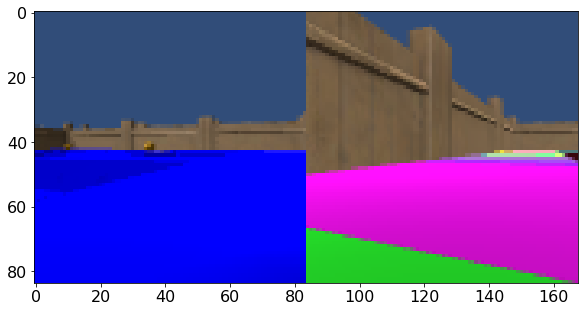

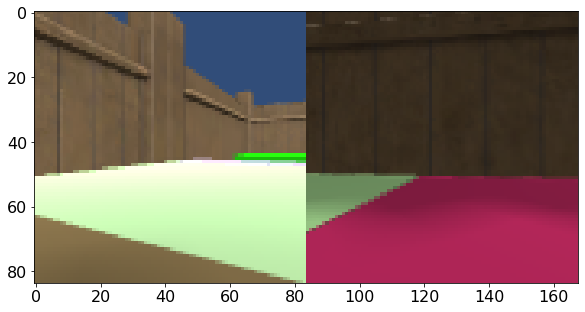

In [17]:
plot_visual_observations(ret1)
plt.figure()
plot_visual_observations(ret2)

## Verify that resetting one arena does not modify the other

In [23]:
def make_reset_one_arena_experiment():
    new_arena_config = ArenaConfig()
    new_arena_config.arenas[0] = arena_config.arenas[0]

    ret1 = env.reset(arena_config)['Learner']
    ret2 = env.reset(new_arena_config)['Learner']
    
    plot_visual_observations(ret1)
    plt.figure()
    plot_visual_observations(ret2)

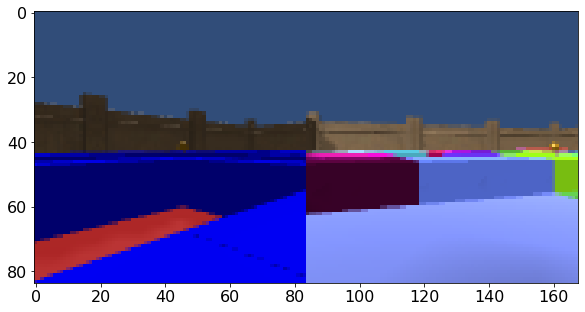

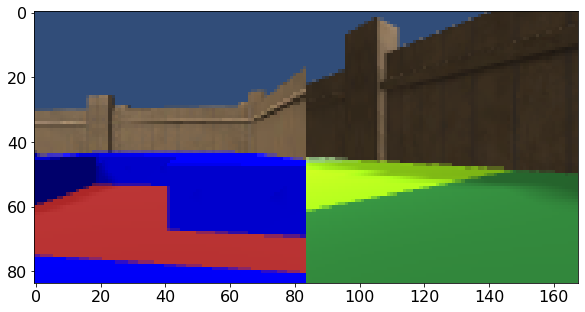

In [24]:
make_reset_one_arena_experiment()

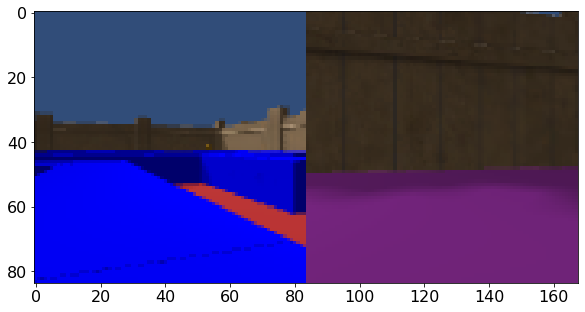

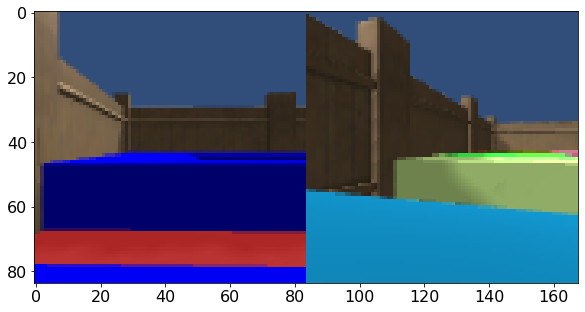

In [25]:
make_reset_one_arena_experiment()

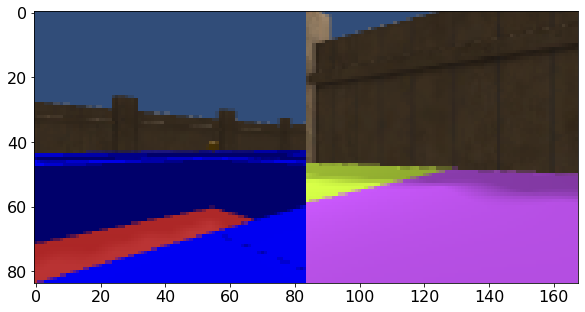

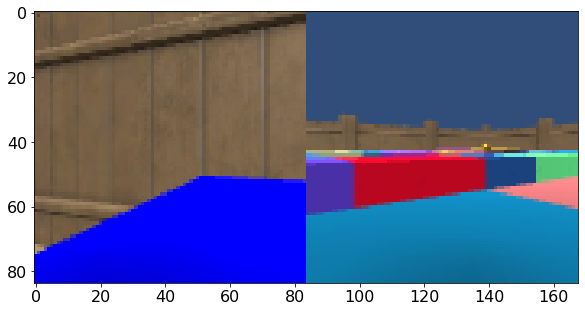

In [26]:
make_reset_one_arena_experiment()

## Experiments with one arena

### Unity Environment

In [38]:
config_filepath = "temp.yaml"
env = _create_environment(config_filepath, n_arenas=1)
arena_config = ArenaConfig(config_filepath)

INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of Training Brains : 1


Let's reduce the amount of time for the arenas.

In [40]:
arena_config.arenas[0].t = 5

In [47]:
def log_ret(ret):
    print(ret.local_done, ret.rewards, ret.previous_vector_actions)

[False] [-0.06666667014360428] [[0. 0.]]


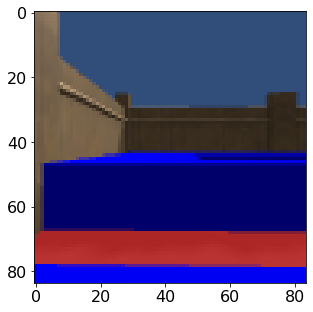

[False] [-0.20000001788139343] [[0. 1.]]


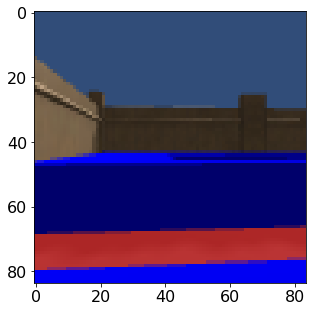

[False] [-0.20000001788139343] [[0. 1.]]


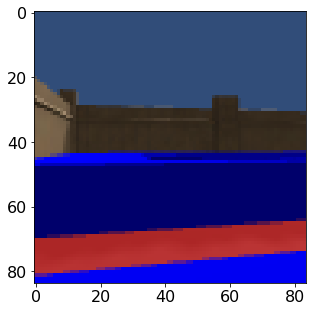

[False] [-0.20000001788139343] [[0. 1.]]


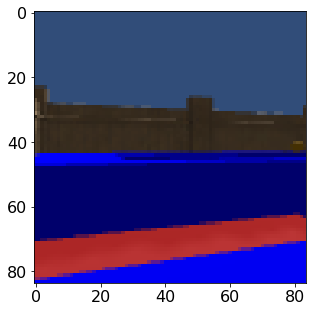

[False] [-0.20000001788139343] [[0. 1.]]


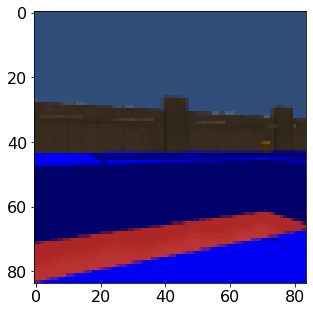

[False] [-0.20000001788139343] [[0. 1.]]


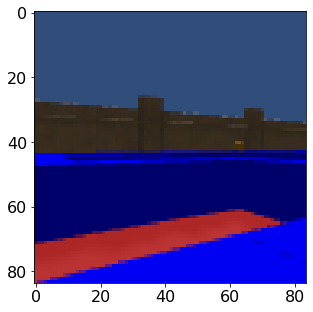

[True] [-0.20000001788139343] [[0. 0.]]


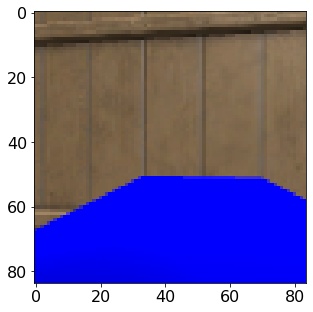

[False] [-0.20000001788139343] [[0. 1.]]


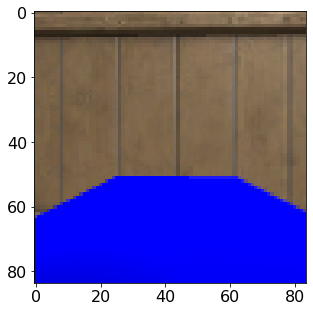

[False] [-0.20000001788139343] [[0. 1.]]


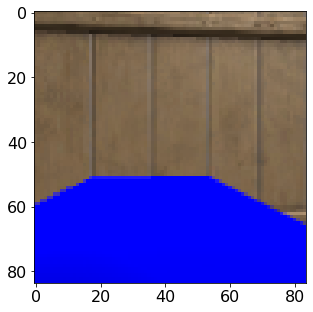

[False] [-0.20000001788139343] [[0. 1.]]


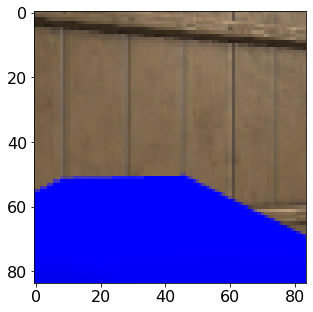

[False] [-0.20000001788139343] [[0. 1.]]


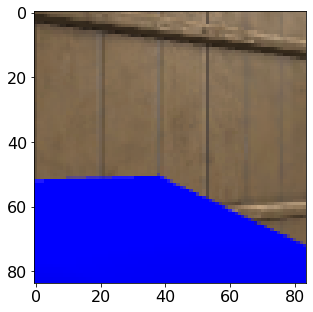

[False] [-0.20000001788139343] [[0. 1.]]


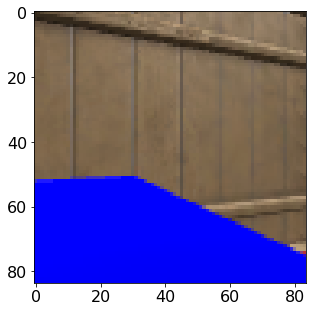

[True] [-0.20000001788139343] [[0. 0.]]


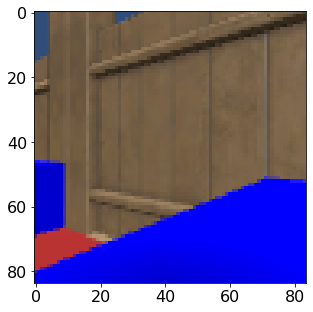

In [52]:
ret = env.reset(arena_config)['Learner']
log_ret(ret)
plot_visual_observations(ret)
plt.show()
for _ in range(12):
    ret = env.step([0, 1])['Learner']
    log_ret(ret)
    plot_visual_observations(ret)
    plt.show()

In [44]:
vars(ret)

{'visual_observations': [array([[[[0.45490196, 0.38039216, 0.27843137],
           [0.45882353, 0.38823529, 0.28235294],
           [0.47843137, 0.39607843, 0.29803922],
           ...,
           [0.54901961, 0.46666667, 0.36862745],
           [0.54901961, 0.47058824, 0.37647059],
           [0.54509804, 0.4627451 , 0.36862745]],
  
          [[0.45098039, 0.38039216, 0.2745098 ],
           [0.44705882, 0.37647059, 0.27058824],
           [0.45882353, 0.37647059, 0.28627451],
           ...,
           [0.54901961, 0.47058824, 0.37254902],
           [0.56470588, 0.48235294, 0.38823529],
           [0.56078431, 0.47843137, 0.38039216]],
  
          [[0.38039216, 0.32156863, 0.22745098],
           [0.38431373, 0.3254902 , 0.23137255],
           [0.38823529, 0.31764706, 0.23529412],
           ...,
           [0.54509804, 0.4627451 , 0.36470588],
           [0.54901961, 0.47843137, 0.37647059],
           [0.54117647, 0.4627451 , 0.36862745]],
  
          ...,
  
          [[0.   

I think it should be enough with replacing the visual observations.

### Env wrapper

In [54]:
config_filepath = "temp.yaml"
env = _create_environment(config_filepath, n_arenas=1)
arena_config = ArenaConfig(config_filepath)

Increasing worker_id: 1


INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of Training Brains : 1


reset


In [57]:
for arena in arena_config.arenas.values():
    arena.t = 5

reset
[False] [-6.666666740784422e-05] [[0. 0.]]


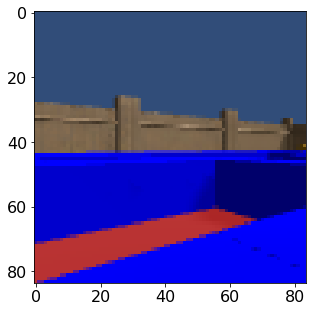

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


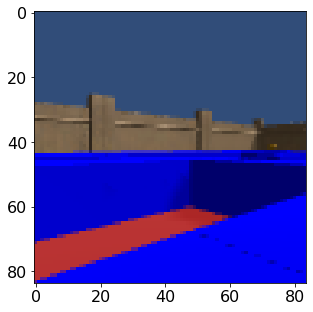

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


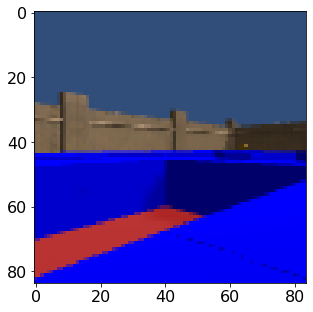

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


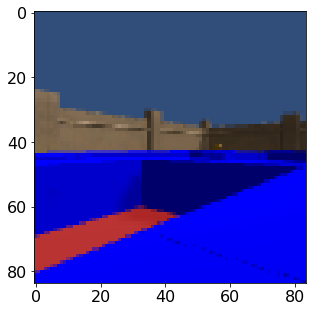

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


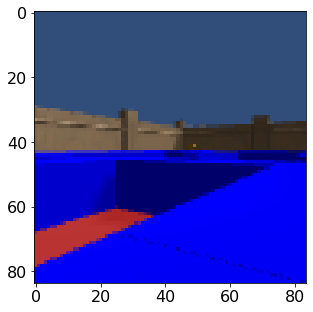

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


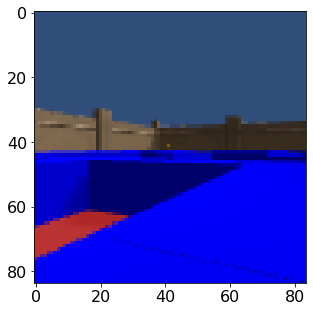

step
[True]
reset
[True] [-0.20000001788139343] [[0. 0.]]


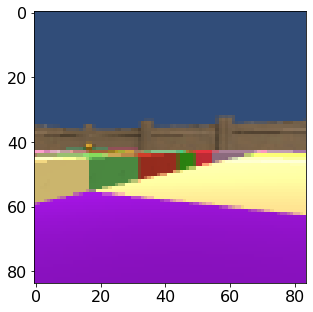

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


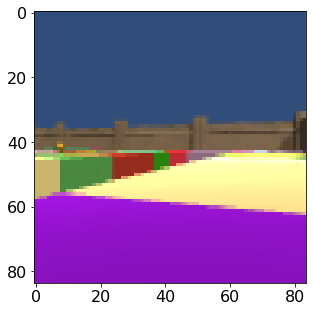

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


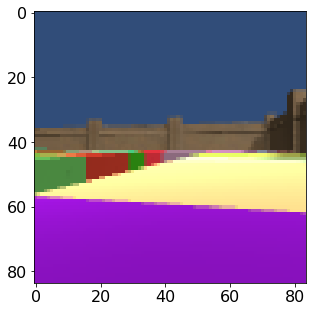

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


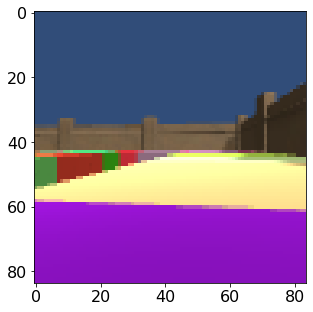

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


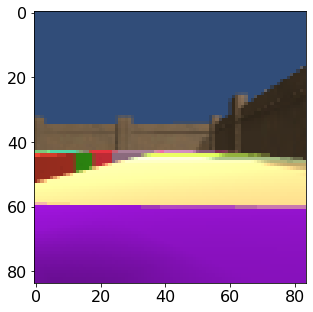

step
[False]
[False] [-0.20000001788139343] [[0. 1.]]


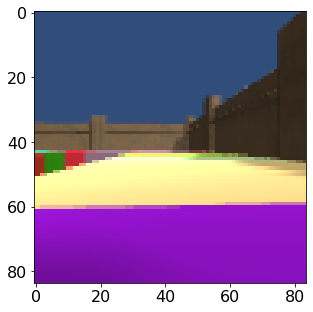

step
[True]
reset
[True] [-0.20000001788139343] [[0. 0.]]


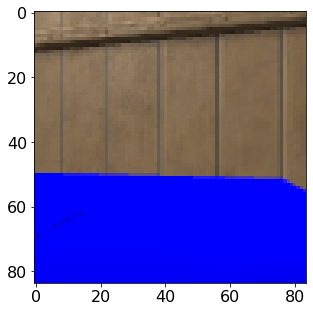

In [58]:
ret = env.reset(arena_config)['Learner']
log_ret(ret)
plot_visual_observations(ret)
plt.show()
for _ in range(12):
    ret = env.step([0, 1])['Learner']
    log_ret(ret)
    plot_visual_observations(ret)
    plt.show()

It seems to be working.

## Summary

Calling the reset method resets all the arenas in the environment. This implies that the only way to make it work is to have a single arena on each environment and having a lot of environments. For example instead of having 8 enviroments with 16 arenas I should have 128 enviroments with one arena.